In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import random
import numpy as np
import collections
from tqdm import tqdm
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import gym
from gym import spaces
import math

In [2]:
class RadarEnv(gym.Env):
    def __init__(self):
        super(RadarEnv, self).__init__()
        # 定义状态空间
        self.observation_space = spaces.Tuple((
            spaces.Box(low=0, high=np.inf, shape=(1,), dtype=np.float32),
            spaces.Discrete(3),  # 雷达工作模式：0表示搜索，1表示跟踪，2表示制导
            spaces.Discrete(3),
            spaces.Discrete(3),
            
        ))
        self.n=10
        # 定义动作空间
        self.action_space = spaces.Tuple((
            spaces.Discrete(3),
            spaces.Discrete(4*self.n)
        ))
        
        self.state=[4.5*10**5,0,0,0]
        self.v=300
        self.ever_state=[0,0,0]
        self.ever_check_1=0
        self.ever_check_2=0
        self.ever_check_3=0
        self.count_1=0
        self.count_2=0
        self.count_3=0

    def reset(self):
        self.state=[4.5*10**5,0,0,0]
        self.v=300
        self.ever_state=[0,0,0]
        self.ever_check_1=0
        self.ever_check_2=0
        self.ever_check_3=0
        self.count_1=0
        self.count_2=0
        self.count_3=0
        return self.state

    def step(self, action):
        done=False
        action_1=action//40
        action_2=action%40
        action=[action_1,action_2]
        R_j_1=(self.state[0]**2+5000**2)**0.5
        R_j_2=self.state[0]
        R_j_3=(self.state[0]**2+5000**2)**0.5
        if action[0]==1:
            P_j_1=0
            P_j_2=(1000-100)%10*action[1]%10+100
            P_j_3=0
            R_max_1=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_1*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_1)**2))/100/0.003981)**0.25
            R_max_2=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_2*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_2)**2))/100/0.003981)**0.25
            R_max_3=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_3*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_3)**2))/100/0.003981)**0.25
            if R_j_1<=R_max_1:
                self.ever_check_1+=1
            elif R_j_2<=R_max_2:
                self.ever_check_2+=1
            elif R_j_3<=R_max_3:
                self.ever_check_3+=1
        elif action[0]==0:
            P_j_1=(1000-100)%10*action[1]%10+100
            P_j_2=0
            P_j_3=0
            R_max_1=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_1*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_1)**2))/100/0.003981)**0.25
            R_max_2=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_2*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_2)**2))/100/0.003981)**0.25
            R_max_3=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_3*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_3)**2))/100/0.003981)**0.25
            if R_j_1<=R_max_1:
                self.ever_check_1+=1
            elif R_j_2<=R_max_2:
                self.ever_check_2+=1
            elif R_j_3<=R_max_3:
                self.ever_check_3+=1
        elif action[0]==2:
            P_j_1=0
            P_j_2=0
            P_j_3=(1000-100)%10*action[1]%10+100
            R_max_1=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_1*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_1)**2))/100/0.003981)**0.25
            R_max_2=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_2*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_2)**2))/100/0.003981)**0.25
            R_max_3=((77000*15.8*15.8*0.0375**2*6*6.4*40)/((4*math.pi)**3*(1.38*10**-23*290*40*10**6*0.00178+(P_j_3*0.0316*15.8*0.0375**2*0.001122)/(4*math.pi)**2/(R_j_3)**2))/100/0.003981)**0.25
            if R_j_1<=R_max_1:
                self.ever_check_1+=1
            elif R_j_2<=R_max_2:
                self.ever_check_2+=1
            elif R_j_3<=R_max_3:
                self.ever_check_3+=1

        self.count_1+=1
        self.count_2+=1
        self.count_3+=1

        self.ever_state[0]=self.state[1]
        self.ever_state[1]=self.state[2]
        self.ever_state[2]=self.state[3]
        #第1个雷达状态转移
        if self.state[1]==0 and self.count_1==4 and self.ever_check_1>=3:
            self.state[1]=1
            self.count_1=0
            self.ever_check_1=0
        elif self.state[1]==1 and self.count_1==3 and self.ever_check_1>=2:
            self.state[1]=2
            self.count_1=0
            self.ever_check_1=0
        elif self.state[1]==1 and self.count_1==3 and self.ever_check_1==0:
            self.state[1]=0
            self.count_1=0
            self.ever_check_1=0
        #第2个雷达状态转移
        if self.state[2]==0 and self.count_2==4 and self.ever_check_2>=3:
            self.state[2]=1
            self.count_2=0
            self.ever_check_2=0
        elif self.state[2]==1 and self.count_2==3 and self.ever_check_2>=2:
            self.state[2]=2
            self.count_2=0
            self.ever_check_2=0
        elif self.state[2]==1 and self.count_2==3 and self.ever_check_2==0:
            self.state[2]=0
            self.count_2=0
            self.ever_check_2=0
        #第3个雷达状态转移
        if self.state[3]==0 and self.count_3==4 and self.ever_check_3>=3:
            self.state[3]=1
            self.count_3=0
            self.ever_check_3=0
        elif self.state[3]==1 and self.count_3==3 and self.ever_check_3>=2:
            self.state[3]=2
            self.count_3=0
            self.ever_check_3=0
        elif self.state[3]==1 and self.count_3==3 and self.ever_check_3==0:
            self.state[3]=0
            self.count_3=0
            self.ever_check_3=0
        
        self.state[0]-=self.v
        # 计算奖励
        reward = self._calculate_reward(action=action)
        # 检查是否达到终止条件
        done = self._check_termination()
        return self.state, reward, done, {}

    def _calculate_reward(self,action):
        #干扰成功奖励
        if self.state[1]+self.state[2]+self.state[3]==self.ever_state[0]+self.ever_state[1]+self.ever_state[2]:
            R1=1
        elif self.state[1]+self.state[2]+self.state[3]<self.ever_state[0]+self.ever_state[1]+self.ever_state[2]:
            R1=5
        else:
            R1=-5
        #干扰功率奖励
        if action[1]%10==0:
            R2=-0.5
        elif action[1]%10==1:
            R2=-0.4
        elif action[1]%10==2:
            R2=-0.3
        elif action[1]%10==3:
            R2=-0.2
        elif action[1]%10==4:
            R2=-0.1
        elif action[1]%10==5:
            R2=0.1
        elif action[1]%10==6:
            R2=0.2
        elif action[1]%10==7:
            R2=0.3
        elif action[1]%10==8:
            R2=0.4
        elif action[1]%10==9:
            R2=0.5
        #干扰样式奖励
        n_t=(450000-self.state[0])/self.v
        if self.state[0]>321000 and self.state[0]<=450000:
            if action[1]//10==0:
                R3=5-(5*self.v)/(450000-321000)*n_t
            else:
                R3=-0.5
        elif self.state[0]>139000 and self.state[0]<=321000:
            if action[1]//10==1:
                R3=5-(5*self.v)/(321000-139000)*n_t
            else:
                R3=-0.5
        elif self.state[0]>77000 and self.state[0]<=139000:
            if action[1]//10==2:
                R3=5-(5*self.v)/(1390000-77000)*n_t
            else:
                R3=-0.5
        elif self.state[0]>16000 and self.state[0]<=77000:
            if action[1]//10==3:
                R3=5-(5*self.v)/(77000-16000)*n_t-1.5
            else:
                R3=-0.5
        else:
            if action[1]//10==3:
                R3=0.5
            else:
                R3=-0.5
        #奖励总值
        reward=R1+R2+R3
        return reward

    def _check_termination(self):
        if self.state[0]<=0 or self.state[1]==2 or self.state[2]==2 or self.state[3]==2:
            return True
        else:
            return False

In [3]:
class ReplayBuffer:
    ''' 经验回放池 '''

    def __init__(self, capacity):
        self.buffer = collections.deque(maxlen=capacity)  # 队列,先进先出

    def add(self, state, action, reward, next_state, done):  # 将数据加入buffer

        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):  # 从buffer中采样数据,数量为batch_size
        transitions = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = zip(*transitions)
        return np.array(state), action, reward, np.array(next_state), done

    def size(self):  # 目前buffer中数据的数量
        return len(self.buffer)

In [4]:
class Qnet(torch.nn.Module):
    ''' 只有一层隐藏层的Q网络 '''
    def __init__(self, state_dim, hidden_dim, action_dim):
        super(Qnet, self).__init__()
        self.fc1 = torch.nn.Linear(state_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, action_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))  # 隐藏层使用ReLU激活函数
        return self.fc2(x)

In [5]:
class VAnet(torch.nn.Module):
    ''' 只有一层隐藏层的A网络和V网络 '''
    def __init__(self, state_dim, hidden_dim, action_dim):
        super(VAnet, self).__init__()
        self.fc1 = torch.nn.Linear(state_dim, hidden_dim)  # 共享网络部分
        self.fc_A = torch.nn.Linear(hidden_dim, action_dim)
        self.fc_V = torch.nn.Linear(hidden_dim, 1)

    def forward(self, x):
        A = self.fc_A(F.relu(self.fc1(x)))
        V = self.fc_V(F.relu(self.fc1(x)))
        Q = V + A - A.mean(1).view(-1, 1)  # Q值由V值和A值计算得到
        return Q

In [6]:
class DQN:
    ''' Dueling DQN '''
    def __init__(self,
                 state_dim,
                 hidden_dim,
                 action_dim,
                 learning_rate,
                 gamma,
                 epsilon,
                 target_update,
                 device,
                 dqn_type='VanillaDQN'):
        self.action_dim = action_dim
        if dqn_type == 'DuelingDQN':  # Dueling DQN采取不一样的网络框架
            self.q_net = VAnet(state_dim, hidden_dim,
                               self.action_dim).to(device)
            self.target_q_net = VAnet(state_dim, hidden_dim,
                                      self.action_dim).to(device)
        else:
            self.q_net = Qnet(state_dim, hidden_dim,
                              self.action_dim).to(device)
            self.target_q_net = Qnet(state_dim, hidden_dim,
                                     self.action_dim).to(device)
        self.optimizer = torch.optim.Adam(self.q_net.parameters(),
                                          lr=learning_rate)
        self.gamma = gamma
        self.epsilon = epsilon
        self.target_update = target_update
        self.count = 0
        self.dqn_type = dqn_type
        self.device = device

    def take_action(self, state):
        if np.random.random() < self.epsilon:
            action = np.random.randint(self.action_dim)
        else:
            state = torch.tensor([state], dtype=torch.float).to(self.device)
            action = self.q_net(state).argmax().item()
        return action

    def max_q_value(self, state):
        state = torch.tensor([state], dtype=torch.float).to(self.device)
        return self.q_net(state).max().item()

    def update(self, transition_dict):
        states = torch.tensor(transition_dict['states'],
                              dtype=torch.float).to(self.device)
        actions = torch.tensor(transition_dict['actions']).view(-1, 1).to(
            self.device)
        rewards = torch.tensor(transition_dict['rewards'],
                               dtype=torch.float).view(-1, 1).to(self.device)
        next_states = torch.tensor(transition_dict['next_states'],
                                   dtype=torch.float).to(self.device)
        dones = torch.tensor(transition_dict['dones'],
                             dtype=torch.float).view(-1, 1).to(self.device)

        q_values = self.q_net(states).gather(1, actions)
        if self.dqn_type == 'DoubleDQN':
            max_action = self.q_net(next_states).max(1)[1].view(-1, 1)
            max_next_q_values = self.target_q_net(next_states).gather(
                1, max_action)
        else:
            max_next_q_values = self.target_q_net(next_states).max(1)[0].view(
                -1, 1)
        q_targets = rewards + self.gamma * max_next_q_values * (1 - dones)
        dqn_loss = torch.mean(F.mse_loss(q_values, q_targets))
        self.optimizer.zero_grad()
        dqn_loss.backward()
        self.optimizer.step()

        if self.count % self.target_update == 0:
            self.target_q_net.load_state_dict(self.q_net.state_dict())
        self.count += 1


In [7]:
lr = 0.001
num_episodes = 1200
gamma = 0.9
epsilon = 0.1
target_update = 10
buffer_size = 2000
minimal_size = 500
batch_size = 120
device = torch.device("cuda")

env =RadarEnv()
env.reset()
replay_buffer = ReplayBuffer(buffer_size)
state_dim = 4
action_dim = 120
hidden_dim = 128
agent = DQN(state_dim, hidden_dim, action_dim, lr, gamma, epsilon,
            target_update, device)

action_P_sum_list=[]
distance_list=[]
return_list = []
for i in range(10):
    with tqdm(total=int(num_episodes / 10), desc='Iteration %d' % i) as pbar:
        for i_episode in range(int(num_episodes / 10)):
            episode_return = 0
            state = env.reset()
            action_P=[]
            done = False
            while not done:
                action = agent.take_action(state)
                action_P.append(action%40)
                #print(action)
                next_state, reward, done, _ = env.step(action)
                replay_buffer.add(state, action, reward, next_state, done)
                state = next_state
                episode_return += reward
                # 当buffer数据的数量超过一定值后,才进行Q网络训练
                if replay_buffer.size() > minimal_size:
                    b_s, b_a, b_r, b_ns, b_d = replay_buffer.sample(batch_size)
                    transition_dict = {
                        'states': b_s,
                        'actions': b_a,
                        'next_states': b_ns,
                        'rewards': b_r,
                        'dones': b_d
                    }
                    agent.update(transition_dict)
            action_P_sum_list.append(sum(action_P)/(len(action_P)*40))
            distance_list.append(state[0])
            return_list.append(episode_return)
            if (i_episode + 1) % 10 == 0:
                pbar.set_postfix({
                    'episode':
                    '%d' % (num_episodes / 10 * i + i_episode + 1),
                    'return':
                    '%.3f' % np.mean(return_list[-10:])
                })
            pbar.update(1)

Iteration 9: 100%|██████████| 120/120 [06:09<00:00,  3.08s/it, episode=1200, return=2170.789]


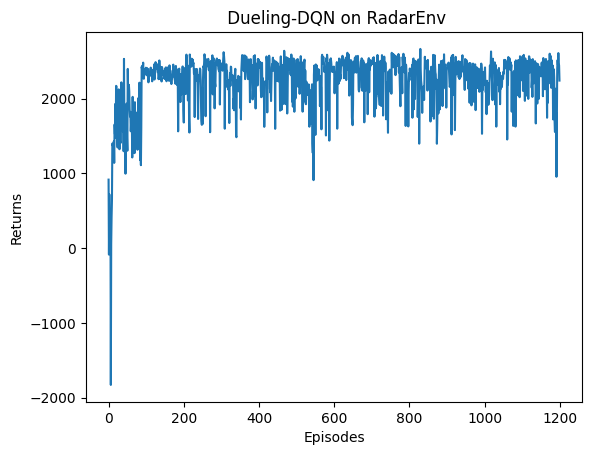

In [8]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title(' Dueling-DQN on {}'.format("RadarEnv"))
plt.show()

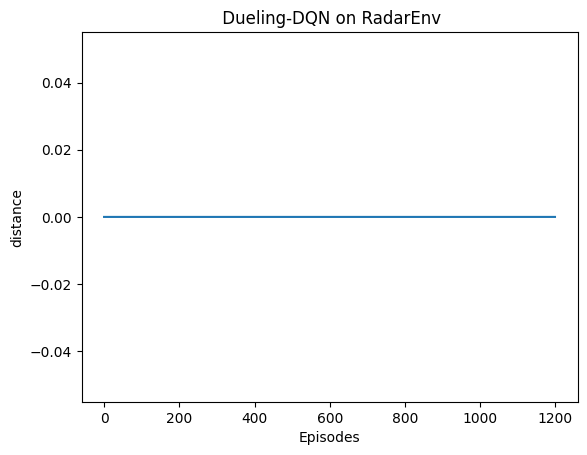

In [12]:
episodes_list = list(range(len(distance_list)))
plt.plot(episodes_list, distance_list)
plt.xlabel('Episodes')
plt.ylabel('distance')
plt.title(' Dueling-DQN on {}'.format("RadarEnv"))
plt.show()

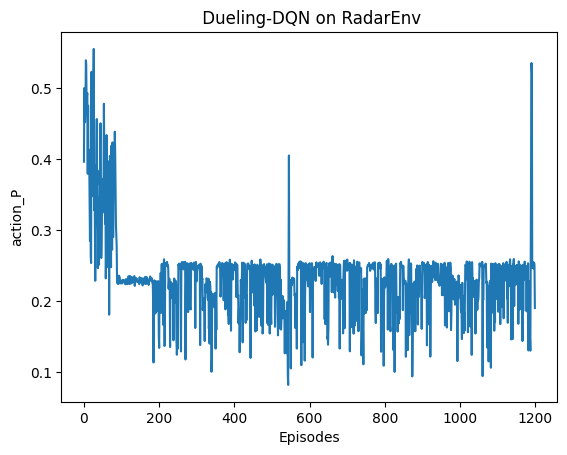

In [11]:
episodes_list = list(range(len(action_P_sum_list)))
plt.plot(episodes_list, action_P_sum_list)
plt.xlabel('Episodes')
plt.ylabel('action_P')
plt.title(' Dueling-DQN on {}'.format("RadarEnv"))
plt.show()